# Introduction to Pandas I

Today we will be using a real-life, messy dataset to practice some of what we've learned about the Pandas library. The dataset itself + a short description of it is available at https://www.kaggle.com/paultimothymooney/phd-stipends.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Let's download the dataset and explore what's inside:

In [2]:
stipends = pd.read_csv('phd-stipends.csv')
print(stipends.shape)
stipends.head()

(7593, 11)


,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
0,"City, University of London",Mathematics,"$16,000",NaN,2019-2020,1st,"$16,000",NaN,NaN,NaN,NaN
1,University of Warwick (UK),Chemistry,"$19,685",NaN,2019-2020,3rd,"$19,685",NaN,NaN,NaN,NaN
2,University of Oxford,Chemistry,"$19,700",NaN,2019-2020,3rd,"$19,700",NaN,NaN,NaN,NaN
3,"Birkbeck, University of London",Biological sciences,"$20,000",NaN,2014-2015,4th,"$20,000",NaN,NaN,NaN,NaN
4,Ohio State University (OSU),Electrical and Computer Engineering,"$23,972",1.19,2019-2020,NaN,NaN,"$18,729","$6,243","$1,000","University covers 85% health insurance, I pay ..."


## Task 1: Select relevant columns
Many columns! We'll really just use University, Department, and Overall Pay today.
Let's create a new dataframe with only these columns.

In [41]:
stipends_essential = stipends.loc[:,['University', 'Department', 'Overall Pay']]

Pandas provides several selection methods, see [here](https://pandas.pydata.org/docs/getting_started/10min.html#selection) and
`.loc` is the prefrered method to select multi-axis data by label. You can also read [here](https://pandas.pydata.org/docs/user_guide/indexing.html#different-choices-for-indexing) for a larger documentation.

In [42]:
stipends_essential.head()

,University,Department,Overall Pay
0,"City, University of London",Mathematics,"$16,000"
1,University of Warwick (UK),Chemistry,"$19,685"
2,University of Oxford,Chemistry,"$19,700"
3,"Birkbeck, University of London",Biological sciences,"$20,000"
4,Ohio State University (OSU),Electrical and Computer Engineering,"$23,972"


We saw that for some variables, there were a lot of NaNs. Let's check if this is there are any NaNs in *Overall Pay* and if so, let's remove them.

In [43]:
stipends_essential['Overall Pay'].isna().sum()

21

Let's remove these 21 NaNs. You can call the `.dropna()` method of a DataFrame, but be wary of the index modification. The following example also uses the `.tail(n)` method that displays the last n items in a DataFrame (5 by default).

In [44]:
# Compare the effect of reset_index() function on the index (left). 
print(stipends_essential.tail())
print(stipends_essential.dropna().tail()) # see that having removed 21 values do not change the index.
print(stipends_essential.dropna().reset_index(drop=True).tail()) #The drop=True in reset_index() method is to prevent pandas from keeping the previous index in a separated column
# We will keep the last one :
stipends_essential = stipends_essential.dropna().reset_index(drop=True)

                        University              Department Overall Pay
7588          Duke University (DU)            Biochemistry     $29,840
7589  University of Virginia (UVA)    Chemical Engineering     $32,000
7590          Duke University (DU)  Biomedical Engineering     $32,000
7591  University of Virginia (UVA)    Chemical Engineering     $25,000
7592          Duke University (DU)  Biomedical Engineering     $27,850
                        University              Department Overall Pay
7588          Duke University (DU)            Biochemistry     $29,840
7589  University of Virginia (UVA)    Chemical Engineering     $32,000
7590          Duke University (DU)  Biomedical Engineering     $32,000
7591  University of Virginia (UVA)    Chemical Engineering     $25,000
7592          Duke University (DU)  Biomedical Engineering     $27,850
                        University              Department Overall Pay
7114          Duke University (DU)            Biochemistry     $29,840
7115  

In [45]:
# safety check: all the NaNs have been removed
stipends_essential['Overall Pay'].isna().sum()

0

## Task 2: Rename columns
All good but as we've learned, it's useful to not have spaces within column names: that way we can often refer to them as `df.column` instead of `df['column']`. Let's rename the columns avoiding spaces.

In [8]:
stipends_essential.columns

Index(['University', 'Department', 'Overall Pay'], dtype='object')

In [46]:
stipends_essential.columns = ['University', 'Department', 'Stipend']

## Task 3: Calculate average stipend
Our goal is to be able to see what the overall distribution of stipends is. First, let's calculate the average stipends. But this is real data entered by the users of a website, so we might need to clean the dataframe some.

We know that a useful function to getting descriptive stats for your dataframe is `.describe()`. Let's try to use it.

In [10]:
stipends_essential.describe()

,University,Department,Stipend
count,7119,7119,7119
unique,625,2208,2257
top,Duke University (DU),Chemistry,"$30,000"
freq,153,302,273


It seems like *Stipend* is not numeric! Let's investigate: We can check which types of data are in each of our columns using .info()

In [11]:
stipends_essential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7119 entries, 0 to 7118
Data columns (total 3 columns):
University    7119 non-null object
Department    7119 non-null object
Stipend       7119 non-null object
dtypes: object(3)
memory usage: 167.0+ KB


`object` can contain strings or data of different types. Let's see how else we can check what sort of data we have in *Stipend*.

In [12]:
type(stipends_essential.Stipend)

pandas.core.series.Series

Using *type* on a whole column is not super-helpful, because every column is just a pandas series object.

In [47]:
type(stipends_essential.Stipend[0])

str

In [48]:
data_types = []
for i in range(len(stipends_essential.Stipend)):
    data_types.append(str(type(stipends_essential.Stipend[i])))

print(np.unique(data_types))

["<class 'str'>"]


String! To get the average stipend, we need to convert all these strings to floats. Let's try `.astype(float)` on the *Stipend* column of our dataframe to do this

In [49]:
stipends_essential.Stipend.astype(float)

ValueError: could not convert string to float: '$16,000'

This gives an error: we first need to remove the *$s* and the commas. You can do this in different ways: (1) you can apply a function to every row in the dataframe; (2) you can use some built-in Pandas functions that work on whole columns (i.e., no need to apply a function to each row). Let's use the latter option applying `.replace()` to the whole *Stipend* column. If we want the search-and-replace `.replace` function to look within strings, we will use an additional argument: `regex=True`. A good alternative is to use .str.replace. .str functions are specific to working on strings within a dataframe.

In [16]:
stipends_essential['Stipend'] = stipends_essential['Stipend'].replace(',', '', regex=True)
# note that this is the replace method of the DataFrame

In [50]:
stipends_essential['Stipend'] = stipends_essential['Stipend'].str.replace(',', '')

If you want to go row-by-row, here are two options:
  - defining a function and use it with the `.apply` method;
  - using a lambda function.

In [17]:
# Option 1: "real function" (can add other operations right away, too)
def remove_non_numbers(row):
    row.Stipend = row.Stipend.replace(',', '') # note that this is the replace method of the string
    return row.Stipend

stipends_essential.Stipend = stipends_essential.apply(remove_non_numbers, axis = 1)

In [18]:
# Alternative option: "lambda function"
stipends_essential.Stipend = stipends_essential.apply(lambda row: row.Stipend.replace(',',''), axis = 1)

Did it work?

In [19]:
stipends_essential.Stipend.head()

0    $16000
1    $19685
2    $19700
3    $20000
4    $23972
Name: Stipend, dtype: object

Yes, we got rid of all the commas. Now, let's try to do the same with the dollar signs.
If we want the search-and-replace to look within strings, we will use, like above, `regex=True`. But it recognizes *the dollar sign* as a special character, so we'll have to use *\$* for regex to know what we mean is the *literal $*.

In [20]:
stipends_essential.Stipend = stipends_essential.Stipend.replace('\$', '', regex=True)

In [21]:
stipends_essential.Stipend.head()

0    16000
1    19685
2    19700
3    20000
4    23972
Name: Stipend, dtype: object

Now we're good to go: let's convert *Stipend* values to floats.

In [22]:
stipends_essential['Stipend'] = stipends_essential['Stipend'].astype(float)

In [23]:
type(stipends_essential['Stipend'][0])

numpy.float64

In [24]:
stipends_essential.head()

,University,Department,Stipend
0,"City, University of London",Mathematics,16000.0
1,University of Warwick (UK),Chemistry,19685.0
2,University of Oxford,Chemistry,19700.0
3,"Birkbeck, University of London",Biological sciences,20000.0
4,Ohio State University (OSU),Electrical and Computer Engineering,23972.0


.describe() should work now, too.

In [25]:
stipends_essential.describe()

,Stipend
count,7.119000e+03
mean,1.404694e+10
std,1.185197e+12
min,-9.000000e+05
25%,1.900000e+04
50%,2.500000e+04
75%,3.000000e+04
max,1.000000e+14


Something looks wrong:
- why are there negative values? Let's remove them: who knows what the users meant.
- why are the positive values so huge? Let's investigate.

In [26]:
stipends_essential.Stipend.median()

25000.0

In [27]:
stipends_essential.Stipend.mean()

14046941553.395983

The mean is far away from the median. There are some potential explanations for the outliers to find their way into the dataset. For now, let's remove these outliers altogether while tracking how many values we would lose by doing so.

The standard deviation is huge, so removing values that are larger than 2 SDs than the median stipend doesn't make much sense.
An alternative is to cap them at a value that sounds plausible. Let's remove (1) all the negative values and (2) anything above $100000.

In [28]:
stipends_essential.shape # original number of values

(7119, 3)

Let's deal with negative values first.

In [29]:
stipends_essential_clean = stipends_essential[(stipends_essential.Stipend < 100000) & (stipends_essential.Stipend > 0)]

Did we remove too many values?

In [30]:
stipends_essential_clean.shape

(7040, 3)

## Task 4: Plot data distribution
We can use df.hist() function to plot the histogram of the data

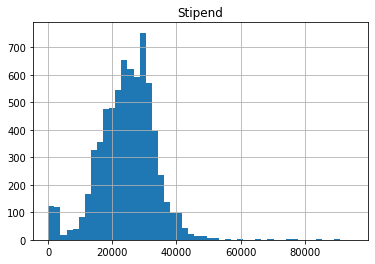

In [31]:
hist = stipends_essential_clean.hist(bins=50)

If you are still concerned about the outliers, you can also practice calculating descriptive statistics for columns in Pandas DataFrames.

In [32]:
median_stipend = stipends_essential_clean.Stipend.median()
std_stipend = stipends_essential_clean.Stipend.std()

In [33]:
stipends_essential_clean = stipends_essential_clean[stipends_essential_clean.Stipend > (median_stipend - 2*std_stipend)]

In [34]:
stipends_essential_clean.describe()

,Stipend
count,6770.000000
mean,25498.343131
std,7977.636577
min,6983.000000
25%,20000.000000
50%,25057.500000
75%,30200.000000
max,95000.000000


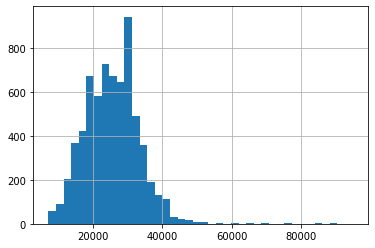

In [35]:
stipends_essential_clean.Stipend.hist(bins=40)
plt.show()

## Bonus task: plot the stipend distribution only for neuroscience students
Hint: Not all department names are just "Neuroscience"

In [36]:
neuro_stipends = stipends_essential_clean[stipends_essential_clean['Department'].str.contains('neuroscience', case = False)].reset_index(drop=True)

In [37]:
neuro_stipends.describe()

,Stipend
count,175.000000
mean,29600.685714
std,6350.333552
min,12000.000000
25%,26750.000000
50%,30000.000000
75%,32750.000000
max,60000.000000


In [38]:
neuro_stipends.Stipend.median() > stipends_essential_clean.Stipend.median()

True

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12069ae48>]],
      dtype=object)

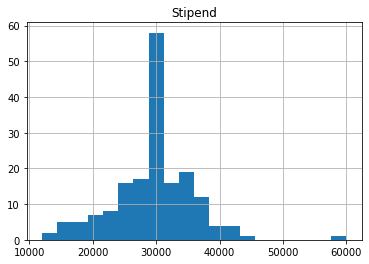

In [39]:
neuro_stipends.hist(bins=20)

## Woop woop, what a nice outcome! Thanks, everyone + see you next week!